# Week 4: Fourier transform: filtering and sampling

The exercise of this week is about Fourier Transform, image filtering and sampling. First load the following libraries that will be necessary.

In [1]:
!pip install scipy
!pip install scikit-image

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [49]:
%matplotlib inline

from time import time
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.pyplot import imshow, show, figure
import numpy as np

from datetime import datetime


Load the two images wall.jpg and sidewalk.jpg.

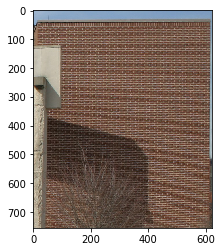

In [4]:
wall = np.array(imread('wall.jpg'), dtype=np.float) / 255.
wall_gray = rgb2gray(wall)
imshow(wall)

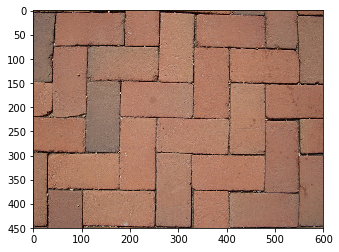

In [5]:
side = np.array(imread('sidewalk.jpg'), dtype=np.float) / 255.
side_gray = rgb2gray(side)
imshow(side)

Preliminary question: which of the two images as the most low pass content? Which one has the most high pass content?

Answer: the first image has most high, second the most low. This is visible at the rapid changes in brightness, colors ect. Image two also has some high frequency aspects especially near the edges of each brick. 

The following functions will be useful in the course of this tutorial: *fft2*, *ifft2* from scipy and the following function:

In [6]:
def gaussian_filter(shape, sigma):
    """
    Returns a 2D gaussian filter specified by its shape and standard deviation.
    """
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## Part A: Filtering

Create three Gaussian filters:
- one 5x5 Gaussian low pass filter with standard deviation 1
- one 15x15 Gaussian high pass filter with standard deviation 3.5. Hint: the high pass content of an image can be extracted by subtracting the low pass filtered image from the original image. Hence, you can get a high pass filter kernel from a low pass one by subtracting the low pass filter kernel from a unit impulse filter.
- one band pass filter. To do this, create first a 15x15 Gaussian filter with standard deviation 1 and then convolve this low pass filter with the previous high pass filter to create the band pass filter.

In [53]:
# Low pass filter
lp_filter = gaussian_filter((5,5), 1)

# High pass filter
lp_filter_2 = gaussian_filter((15,15), 3.5)
uni_filter = np.zeros(np.shape(lp_filter_2))
uni_filter[7,7] = 1
hp_filter = uni_filter - lp_filter_2
hp_filter_f = fftshift(fft2(hp_filter))

# Band pass filter
lp_filter_3 = gaussian_filter((15,15), 1)

bp_filter = convolve(lp_filter_3, hp_filter)
bp_filter_f = fftshift(fft2(bp_filter))

Apply these three filters to the two sample grayscale images in spatial domain first by convolving the image with the kernel, and in frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them. Compare the runtimes of spatial and frequency domain filtering, using the *time* function of python. Compare the filtering results of two images by visualizing the filtered images in both spatial and frequency domains. Check that your initial guess about the low/high pass content of the images is correct.

### Filtering in spatial domain

In [59]:
test1 = np.arange(16.0).reshape((4, 4))
test2 = np.arange(4.0).reshape((2, 2))
np.multiply(test1, test2)
print(test1)
print(test2)
print(np.multiply(test1, test2))


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

Original image:


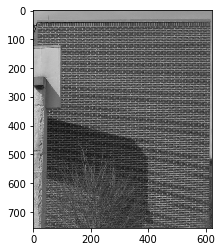

(756, 622)
Lowpass image


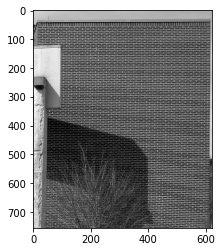

high pass image


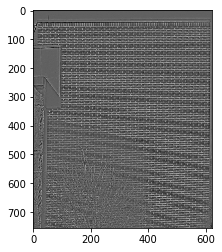

band pass image


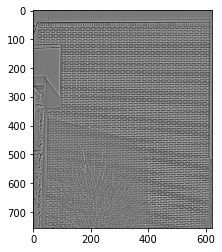

image 1 band pass convolution takes 1326.19 ms


In [41]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()
print(wall_gray.shape)

print("Lowpass image")
imshow(convolve(wall_gray, lp_filter), cmap='gray')
show()
print("high pass image")
imshow(convolve(wall_gray, hp_filter), cmap='gray')
show()

print("band pass image")
starttime = datetime.now().microsecond
bp_filter_image = convolve(wall_gray, bp_filter)
endtime = datetime.now().microsecond
imshow(convolve(wall_gray, bp_filter), cmap='gray')
show()

print("image 1 band pass convolution takes " + str((endtime - starttime) * 10E-3) + " ms")

# Enter your code here

Original image:


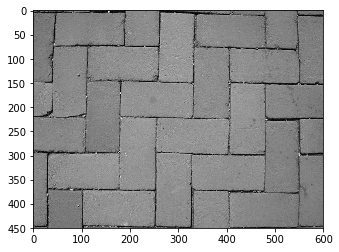

Lowpass image


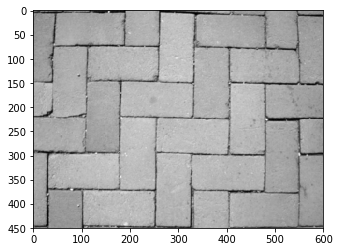

high pass image


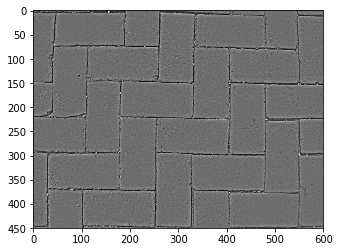

band pass image


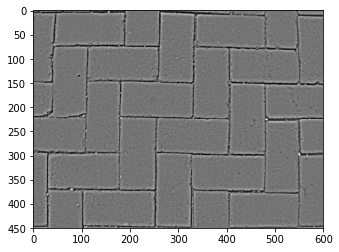

image 1 band pass convolution takes 849.43 ms


In [40]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()


print("Lowpass image")
imshow(convolve(side_gray, lp_filter), cmap='gray')
show()
print("high pass image")
imshow(convolve(side_gray, hp_filter), cmap='gray')
show()

print("band pass image")
starttime2 = datetime.now().microsecond
bp_filter_image2 = convolve(side_gray, bp_filter)
endtime2 = datetime.now().microsecond
imshow(bp_filter_image2, cmap='gray')
show()

print("image 2 band pass convolution takes " + str((endtime2 - starttime2) * 10E-3) + " ms")
# Enter your code here

### Filtering in frequency domain

Note: the output of *ifft2* is a numpy array with complex values. You can use the command *.astype(float)* to convert it back to real numbers.

Original image:


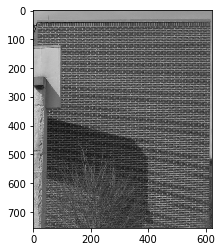

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


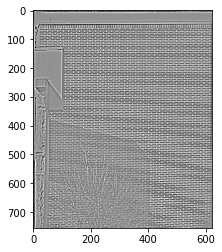

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


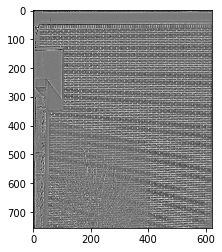

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


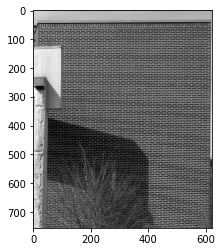

In [62]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

wall_gray_f = fft2(wall_gray)
bp_filter_f = fft2(bp_filter, wall_gray.shape) # hacky --> see question in (handwritten)lecture notes
lp_filter_f = fft2(lp_filter, wall_gray.shape)
hp_filter_f = fft2(hp_filter, wall_gray.shape)
imshow(wall_gray, cmap='gray')

imshow(ifft2(wall_gray_f * bp_filter_f).astype(float), cmap='gray')
show()
imshow(ifft2(wall_gray_f * hp_filter_f).astype(float), cmap='gray')
show()
imshow(ifft2(wall_gray_f * lp_filter_f).astype(float), cmap='gray')
show()

# Enter your code here

Original image:


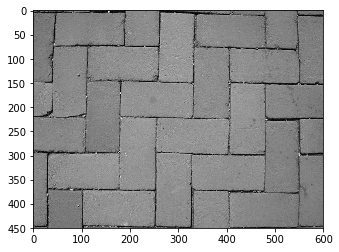

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


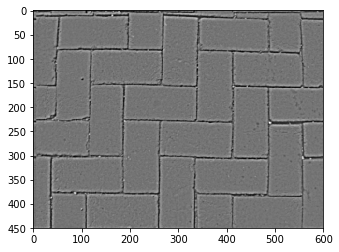

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


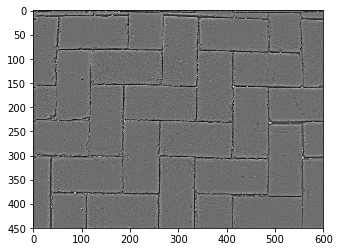

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


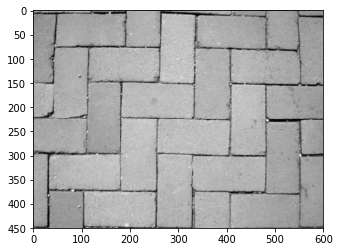

In [63]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

side_gray_f = fft2(side_gray)
bp_filter_f = fft2(bp_filter, side_gray.shape) # hacky --> see question in (handwritten)lecture notes
lp_filter_f = fft2(lp_filter, side_gray.shape)
hp_filter_f = fft2(hp_filter, side_gray.shape)
imshow(wall_gray, cmap='gray')

imshow(ifft2(side_gray_f * bp_filter_f).astype(float), cmap='gray')
show()
imshow(ifft2(side_gray_f * hp_filter_f).astype(float), cmap='gray')
show()
imshow(ifft2(side_gray_f * lp_filter_f).astype(float), cmap='gray')
show()

# Enter your code here

## Part B: Sampling

Downsample both images to one fourth of the resolution by taking every second row and column. You can use numpy array slicing for this: *my_array[start:end:step]*. Compare the results in terms of distortions and unexpected effects. Explain why the quality of the two downsampled images differ. 

(450, 600)
(225, 300)


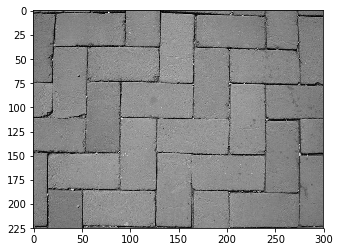

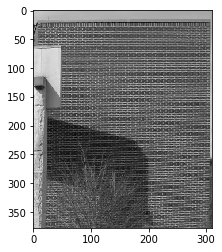

In [72]:
# Enter your code here
print(side_gray.shape)
height, width = side_gray.shape
height2, width2 = wall_gray.shape
side_gray_lq = (side_gray[0:height:2])[:,0:width:2]
wall_gray_lq = (wall_gray[0:height2:2])[:,0:width2:2]

print(side_gray_lq.shape)
imshow(side_gray_lq, cmap='gray')
show()
imshow(wall_gray_lq, cmap='gray')
show()



Create three 15x15 Gaussian low pass filters with standard deviations 0.5, 1 and 1.5 and apply them to the color image wall.jpg. You can filter the three channels separately and gather them in an RGB image with the numpy function *np.stack([r_img, g_img, b_img], axis=-1)*. Downsample the three filtered images to one fourth resolution. Compare the resulting downsampled images in terms of quality.

Filter: applied std deviation: 0.5


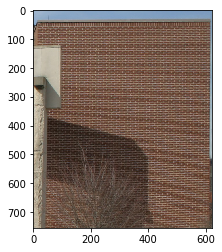

Filter: applied std deviation: 1


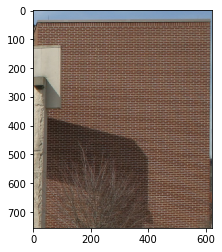

Filter: applied std deviation: 1.5


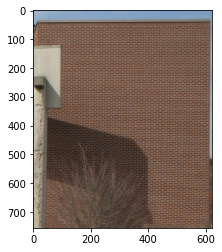

downsampled with filter std_dev0.5


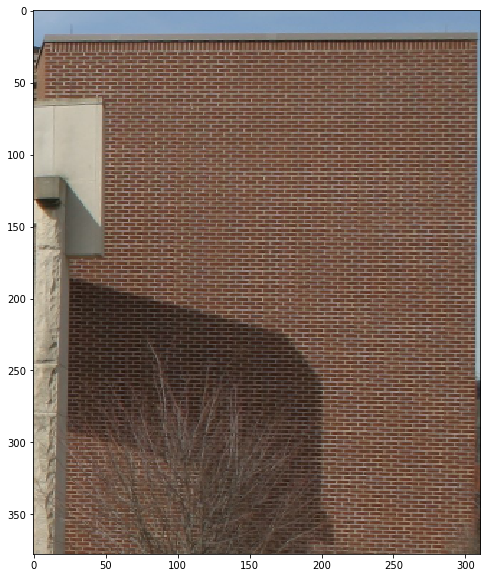

NameError: name 'conter' is not defined

In [93]:
# Create the filters
def create_gaussian(stdev):
    return gaussian_filter((15,15), stdev)

std_dev_list = [0.5, 1 , 1.5]

# Convolve them with the RGB image
wall_img_list = list()
for std_dev in std_dev_list:
    #create appropriate filter
    gauss_filter = create_gaussian(std_dev)
    
    #convolve each colorspace
    color_collection = list()
    for i in range(3): # do it for rgb
        color_collection.append(convolve(wall[:,:,i], gauss_filter))

    wall_smooth = np.stack(color_collection[:], axis = -1)
    wall_img_list.append(wall_smooth)
    print("Filter: applied std deviation: " + str(std_dev))
    imshow(wall_smooth, cmap='gray')
    show()
    
    
    
    
# Downsample the resulting images
scaled_img_list = list()
counter = 0
for img in wall_img_list:
    figure(figsize=(10, 10))
    print("downsampled with filter std_dev" + str(std_dev_list[counter]))
    wall_lq = (img[0:height2:2])[:,0:width2:2]
    imshow(wall_lq, cmap='gray')
    show()
    counter += 1 
    



## Bonus: for those that finished earlier

Load the blurred road signs image and using your fresh knowledge about filters, design the perfect filter to make the text readable.

/home/lucas/.virtualenvs/vis_comp_env/lib/python2.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


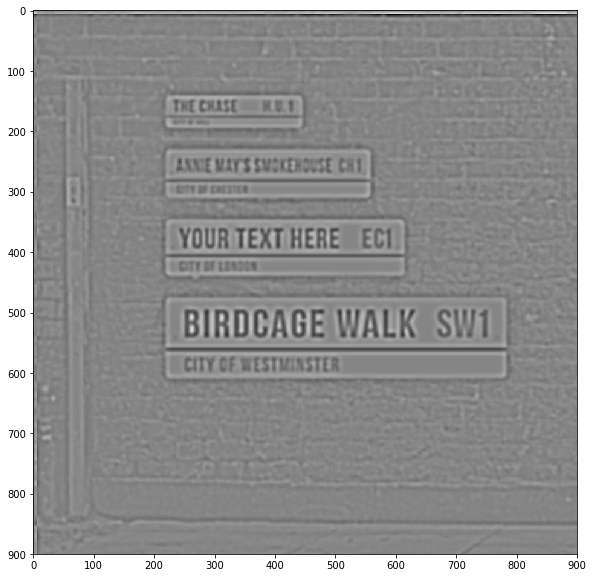

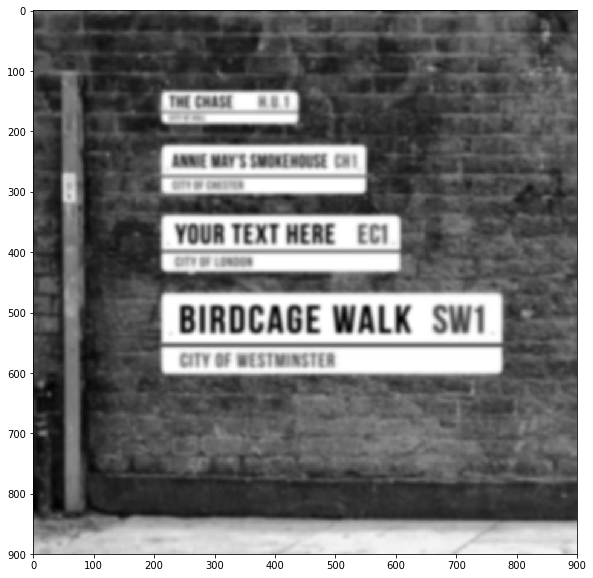

In [101]:
blurred_road_signs = np.array(imread('blurred_road_signs.jpg', as_gray=True), dtype=np.float) / 255.



road_sign_ft = fft2(blurred_road_signs)
hpf = fft2(hp_filter, road_sign_ft.shape)

figure(figsize=(10, 10))
imshow(ifft2(np.multiply(hpf, road_sign_ft)).astype(float) , cmap='gray')
show()
figure(figsize=(10, 10))
imshow(blurred_road_signs, cmap = 'gray')
show()